## 作業
畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

In [27]:
import os
import keras
os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU

import matplotlib.pyplot as plt

train, test = keras.datasets.cifar10.load_data()

In [28]:
import cv2 # 載入 cv2 套件
print(cv2.__version__)

4.1.0


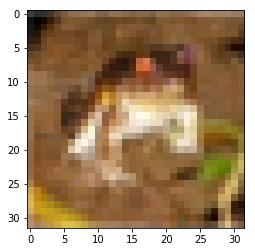

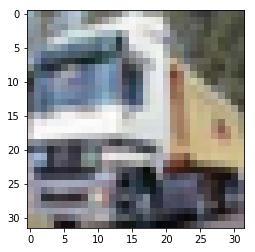

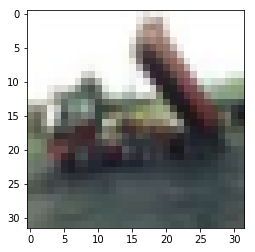

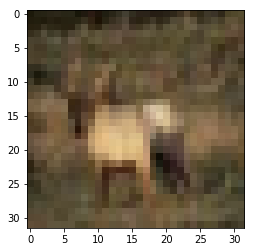

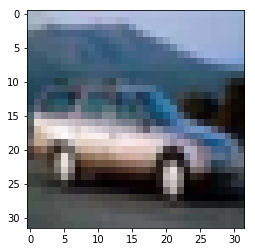

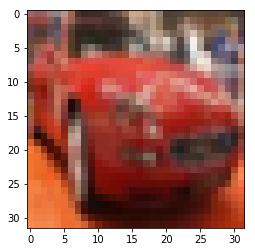

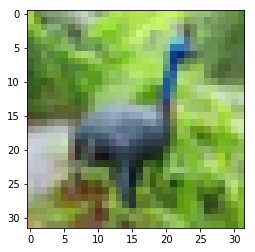

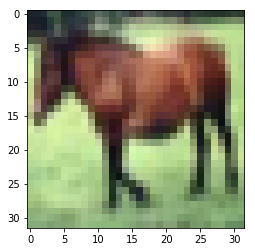

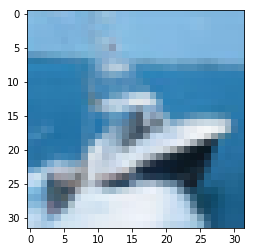

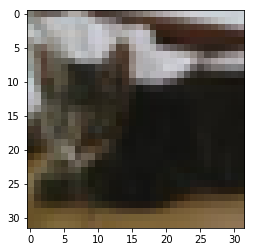

In [29]:
# 測試看看有甚麼圖片
image = []
for i in range(10):
    image.append(train[0][i]) # 讀取圖片

    plt.imshow(image[i])
    plt.show()

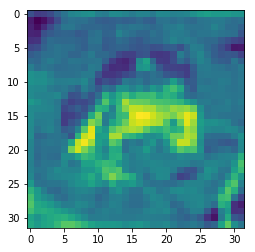

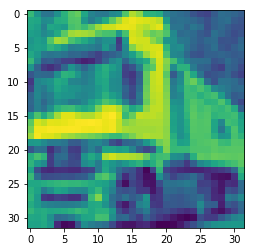

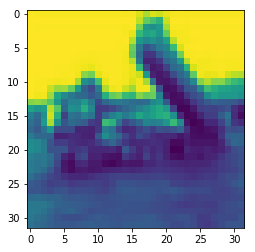

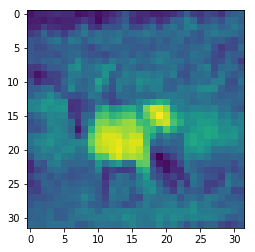

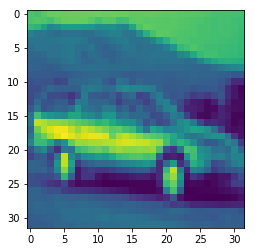

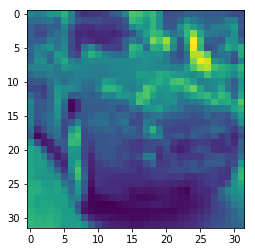

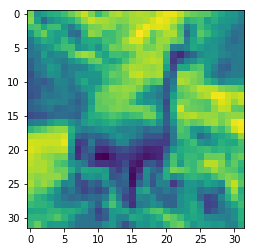

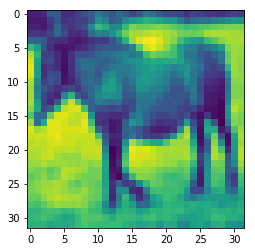

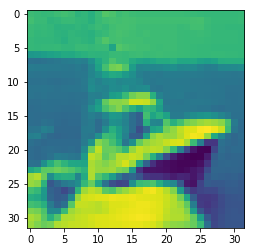

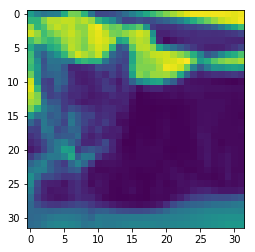

In [30]:
# 把彩色的圖片轉為灰度圖
for i in image:
    gray = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
    plt.imshow(gray)
    plt.show()

In [31]:
len(image)

10

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

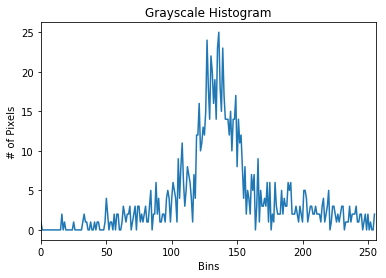

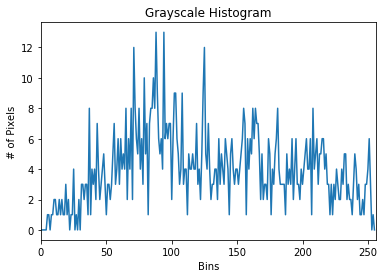

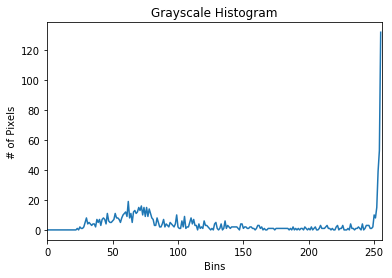

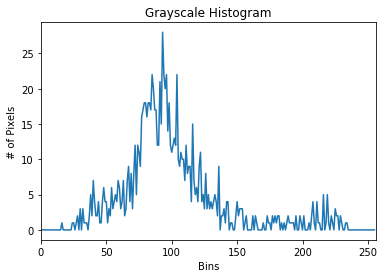

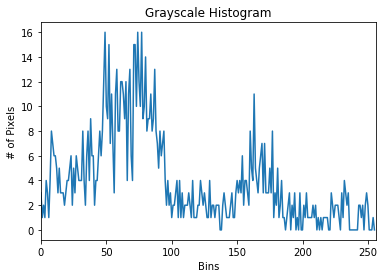

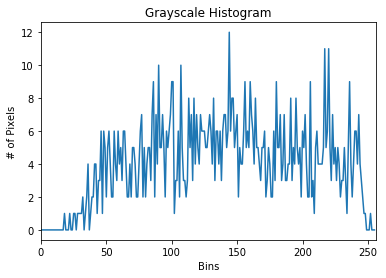

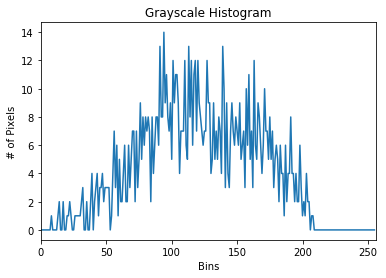

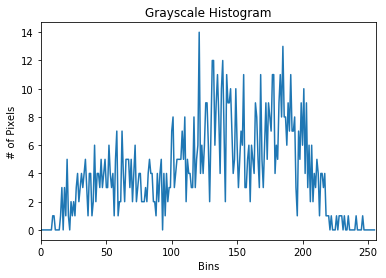

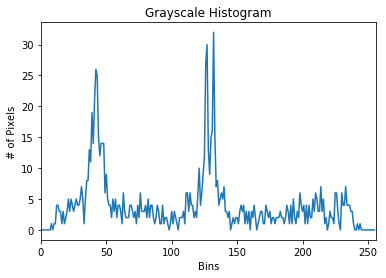

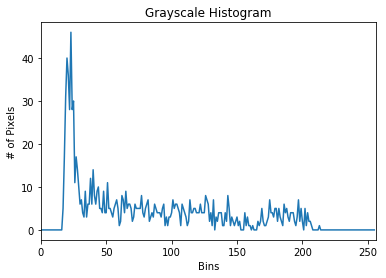

In [32]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
for i,image_num in enumerate(image):
    hist = cv2.calcHist([image_num], [0], None, [256], [0, 256])
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

In [33]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) # 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1

hist shape: (256, 1) 
直方圖中前兩個值: [[0.]
 [0.]]


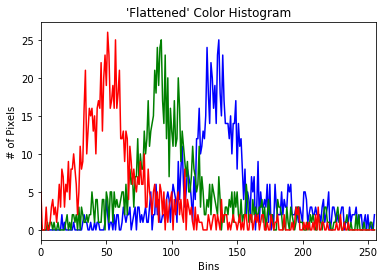

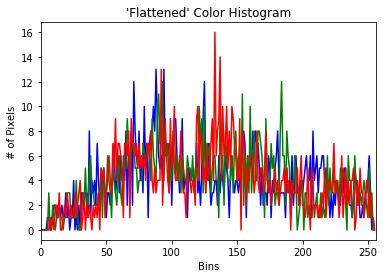

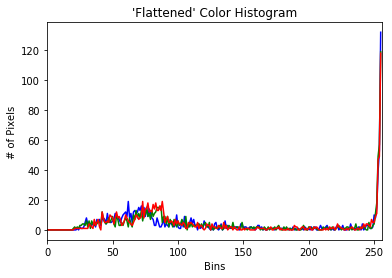

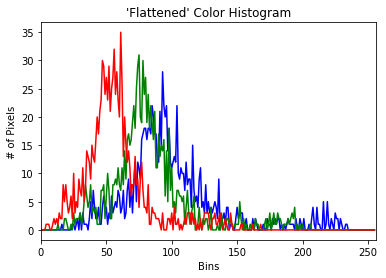

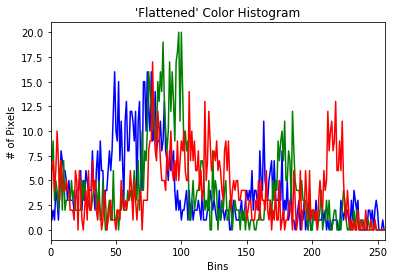

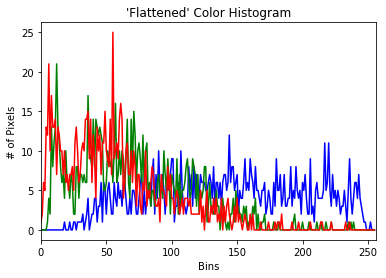

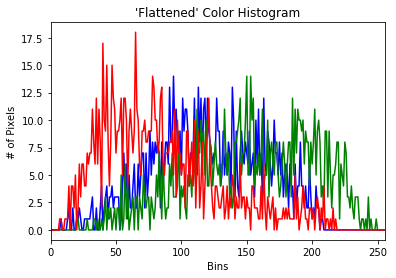

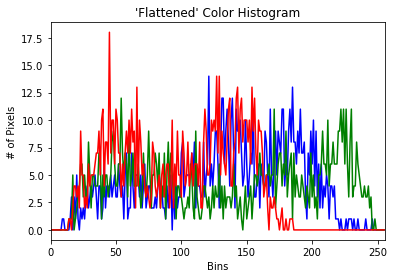

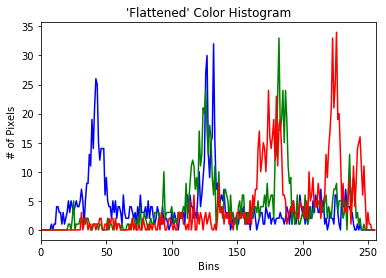

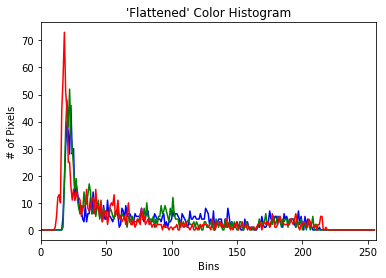

In [34]:
#注意:opencv中，splict成RGB的話三個通道是反過來的
# channels[0, 1 ,2] 分別是 B, G, R 

for i,image_num in enumerate(image):
    chans = cv2.split(image_num) # 把圖像的 3 個 channel 切分出來
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("'Flattened' Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    # 對於所有 channel
    for (chan, color) in zip(chans, colors):
        # 計算該 channel 的直方圖
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])

        # 畫出該 channel 的直方圖
        plt.plot(hist, color = color)
        plt.xlim([0, 256])
    plt.show()

畫出 16 個 bin 的顏色直方圖,  
並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

在[16:32]這個 Bins 中
b 總共有: 685.0 個
g 總共有: 220.0 個
r 總共有: 88.0 個


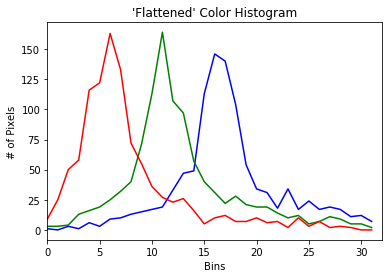

------------------------------------------------
在[16:32]這個 Bins 中
b 總共有: 491.0 個
g 總共有: 509.0 個
r 總共有: 532.0 個


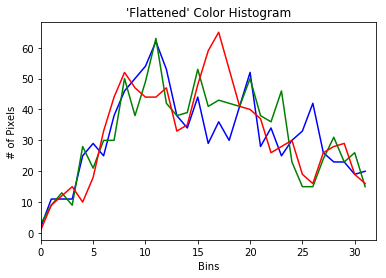

------------------------------------------------
在[16:32]這個 Bins 中
b 總共有: 415.0 個
g 總共有: 409.0 個
r 總共有: 375.0 個


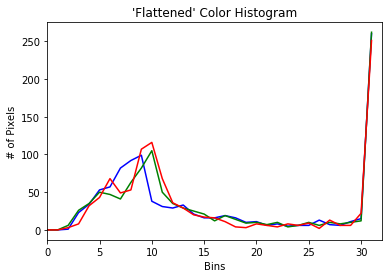

------------------------------------------------
在[16:32]這個 Bins 中
b 總共有: 154.0 個
g 總共有: 80.0 個
r 總共有: 31.0 個


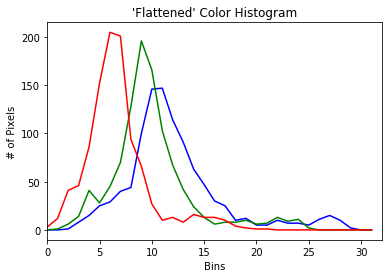

------------------------------------------------
在[16:32]這個 Bins 中
b 總共有: 266.0 個
g 總共有: 274.0 個
r 總共有: 390.0 個


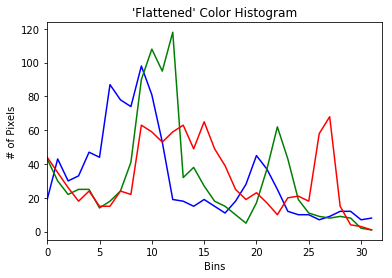

------------------------------------------------
在[16:32]這個 Bins 中
b 總共有: 598.0 個
g 總共有: 105.0 個
r 總共有: 75.0 個


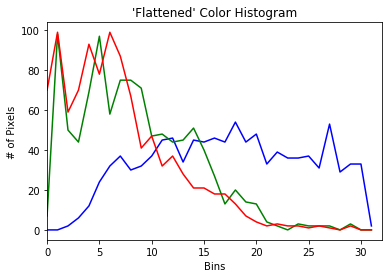

------------------------------------------------
在[16:32]這個 Bins 中
b 總共有: 442.0 個
g 總共有: 706.0 個
r 總共有: 172.0 個


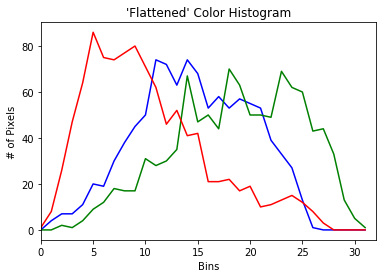

------------------------------------------------
在[16:32]這個 Bins 中
b 總共有: 599.0 個
g 總共有: 549.0 個
r 總共有: 340.0 個


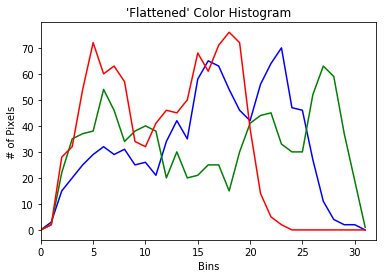

------------------------------------------------
在[16:32]這個 Bins 中
b 總共有: 407.0 個
g 總共有: 683.0 個
r 總共有: 924.0 個


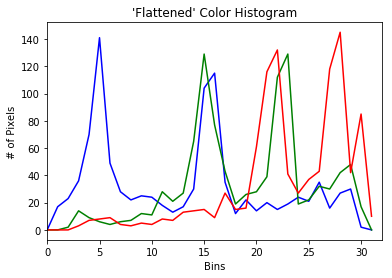

------------------------------------------------
在[16:32]這個 Bins 中
b 總共有: 214.0 個
g 總共有: 182.0 個
r 總共有: 176.0 個


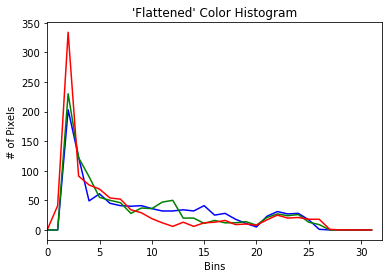

------------------------------------------------


In [35]:
for i,image_num in enumerate(image):
    chans = cv2.split(image_num) # 把圖像的 3 個 channel 切分出來
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("'Flattened' Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    
    print("在[16:32]這個 Bins 中")
    # 對於所有 channel
    for (chan, color) in zip(chans, colors):
        # 計算該 channel 的直方圖
        hist = cv2.calcHist([chan], [0], None, [32], [0, 256])
        print(color, "總共有:", hist[16:32].sum() ,"個")
        
        # 畫出該 channel 的直方圖
        plt.plot(hist, color = color)
        plt.xlim([0, 32])
    plt.show()
    print("------------------------------------------------")

bins觀念釐清

b 總共有: 1024.0 個
g 總共有: 1024.0 個
r 總共有: 1024.0 個


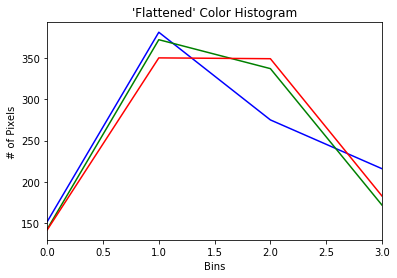

In [36]:
# 觀察一下 可以看出切成[4] 表示256個被分成4個區間
# 而如果切成[64] 表示被分成16個區間 所以每個區間所含的像素量比較少
# 要注意hist[0:63].sum()計算 跟 hist = cv2.calcHist([chan], [0], None, [4], [0, 256])畫圖顯示無關

ch = cv2.split(image[1]) # 把圖像的 3 個 channel 切分出來
co = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
    
for (chan, color) in zip(ch, co):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [4], [0, 256])
    print(color, "總共有:", hist[0:63].sum() ,"個")

    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 3])
plt.show()

b 總共有: 1020.0 個
g 總共有: 1020.0 個
r 總共有: 1019.0 個


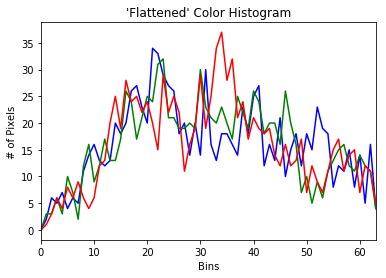

In [37]:
# 觀察一下 可以看出切成[4] 表示256個被分成4個區間
# 而如果切成[64] 表示被分成16個區間 所以每個區間所含的像素量比較少
# 要注意hist[0:63].sum()計算 跟 hist = cv2.calcHist([chan], [0], None, [4], [0, 256])畫圖顯示無關

ch_64 = cv2.split(image[1]) # 把圖像的 3 個 channel 切分出來
co_64 = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
    
for (chan, color) in zip(ch_64, co_64):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [64], [0, 256])
    print(color, "總共有:", hist[0:63].sum() ,"個")

    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 63])
plt.show()

In [40]:
# 儲存一張圖片 然後到photoshop確認
cv2.imwrite('output.jpg', image[0])

True

In [41]:
cv2.imwrite('output2.jpg', image[5])

True